### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, classification_report

### Reading the dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

##### No. of rows in dataset : 145460

##### No. of columns in dataset : 23

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Separating columns into categorical and numerical

In [5]:
cat_var = df.select_dtypes(include='object')
cat_var.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
num_var = df.select_dtypes(exclude='object')
num_var.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

### Null values calculation and treatment

In [7]:
# number of null values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
# percent of null values in each column 
round(df.isnull().sum()/len(df)*100,2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

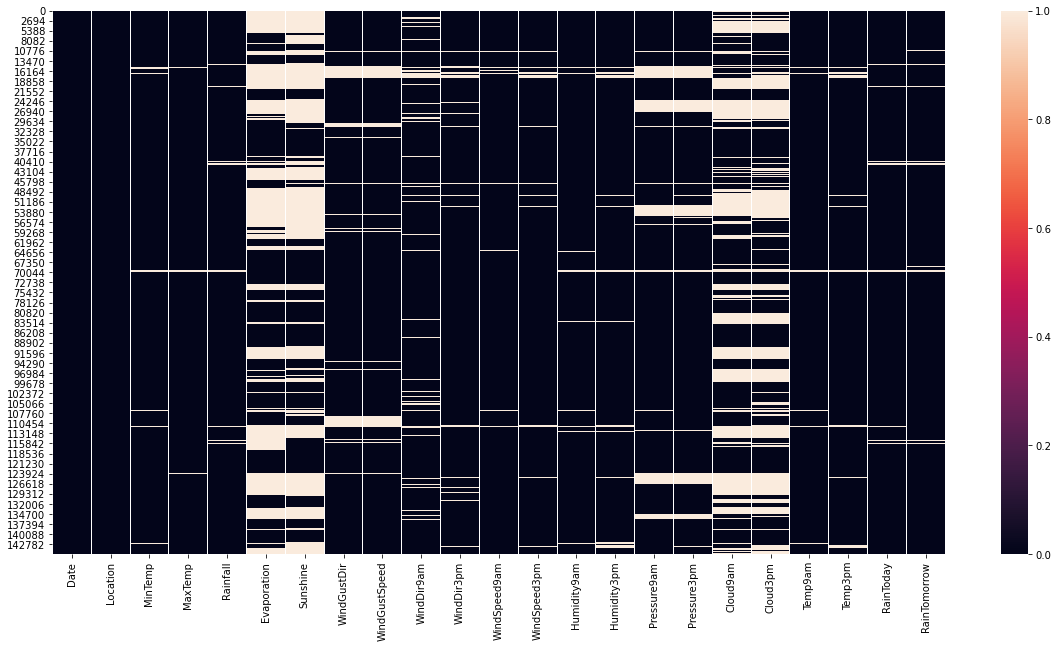

In [9]:
# visual representation of null values in each column 
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [10]:
# skewness of each column
df.skew()

MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
dtype: float64

~ 5-15% null values - drop the rows

~ 20-50% of null vaues - replace with mean, median, mode (based on skewness and type of variable)

~ more than 50% - drop the columns

~ Replacing column 'Evaporation' with median because it is skewed.

~ Replacing columns 'Sunshine', 'Cloud9am' and 'Cloud3pm' with mean because they are almost symmetrical.

~ Dropping the remaining null values because they are less in number.

In [11]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Null values have been treated. 

Checking shape of dataframe after treatment of null values

In [14]:
df.shape

(112925, 23)

## Visualizations

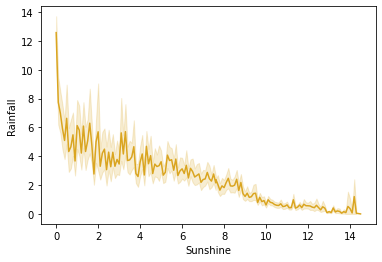

In [15]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='goldenrod')

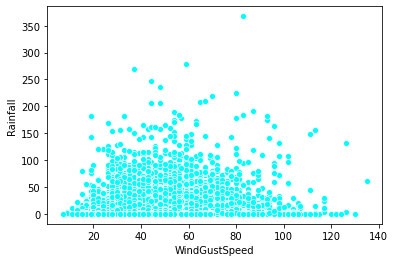

In [16]:
sns.scatterplot(data=df,x='WindGustSpeed',y='Rainfall',color='cyan')

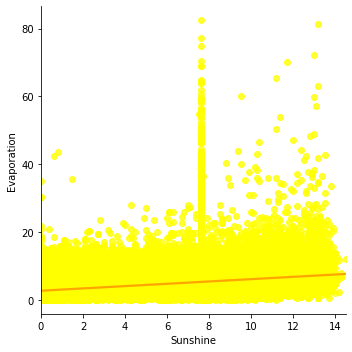

In [17]:
sns.lmplot(data=df,x='Sunshine',y='Evaporation',scatter_kws={"color": "yellow"},line_kws={'color': 'orange'})

In [18]:
avg_rain_by_location = df['Rainfall'].groupby(df['Location']).mean()
df1 = pd.DataFrame(data=avg_rain_by_location.index, columns=['Location'])
df2 = pd.DataFrame(data=avg_rain_by_location.values, columns=['Avg_Rain_Received'])
df_rain = pd.merge(df1, df2, left_index=True, right_index=True)
df_rain

,Location,Avg_Rain_Received
0,Adelaide,1.634818
1,Albury,2.180902
2,AliceSprings,0.914577
3,BadgerysCreek,2.370951
4,Ballarat,1.670357
5,Bendigo,1.696498
6,Brisbane,3.047550
7,Cairns,5.685892
8,Canberra,1.871706
9,Cobar,1.150428


In [19]:
sort = df_rain.sort_values('Avg_Rain_Received', ascending=False)
top_5 = sort.head(5)
top_5

,Location,Avg_Rain_Received
7,Cairns,5.685892
12,Darwin,5.028168
10,CoffsHarbour,5.026730
13,GoldCoast,3.635378
40,Williamtown,3.569339


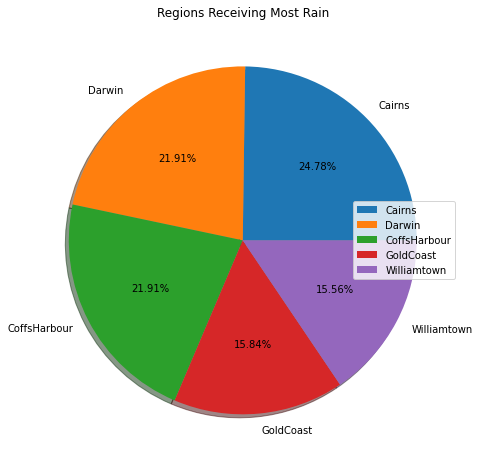

In [20]:
plt.figure(figsize = (10,8))
loc = top_5["Avg_Rain_Received"].to_numpy()
labels = top_5["Location"].to_numpy()
plt.pie(loc, labels=labels,autopct='%1.2f%%', explode=(0,0,0,0,0), shadow=True)
plt.title('Regions Receiving Most Rain')
plt.legend(loc='right')
plt.show()

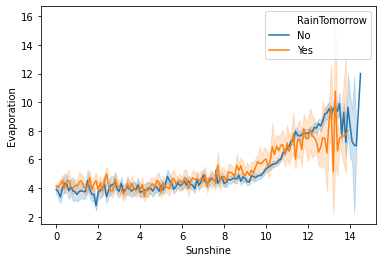

In [21]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',hue='RainTomorrow')

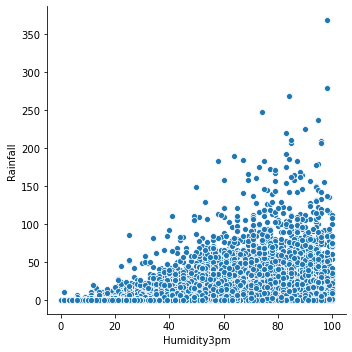

In [22]:
sns.relplot(data=df, x="Humidity3pm", y="Rainfall")

#### Dropping 'Date' column as it is irrelevant

In [23]:
df1 = df.drop(columns='Date')
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,7.611178,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,7.611178,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,7.611178,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,4.8,7.611178,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,4.8,7.611178,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,4.8,7.611178,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No


In [24]:
# numerical variables dataset
numvar = df1.select_dtypes(exclude='object')
numvar

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.1,0.0,4.8,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.7,0.0,4.8,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.0,0.0,4.8,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.3,1.0,4.8,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,7.611178,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9
145455,2.8,23.4,0.0,4.8,7.611178,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4
145456,3.6,25.3,0.0,4.8,7.611178,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5
145457,5.4,26.9,0.0,4.8,7.611178,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1


In [25]:
# categorical variables dataset
catvar = df1.select_dtypes(include='object')
catvar

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
145454,Uluru,E,ESE,E,No,No
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No


#### As algorithm cannot understand categorical variables, we need to create dummy variables.

In [26]:
dummy = pd.get_dummies(data=catvar,drop_first=True)
dummy.head()

,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Concatenating numerical variables dataframe with dummy dataframe to get our final dataframe to build model.

In [27]:
final_df = pd.concat([numvar,dummy],axis=1)
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,4.8,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,4.8,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,4.8,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,4.8,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,7.611178,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
final_df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
145454,3.5,21.8,0.0,4.8,7.611178,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.8,7.611178,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,7.611178,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,7.611178,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,1,0,0,0
145458,7.8,27.0,0.0,4.8,7.611178,28.0,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Split

In [29]:
x = final_df.drop('RainTomorrow_Yes',axis=1)
y = final_df['RainTomorrow_Yes']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

### Fitting the model

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
ypred = lr.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, classification_report

In [37]:
print(confusion_matrix(ytest,ypred))

[[16605   919]
 [ 2521  2540]]


##### True Positive : Model predicted that it will rain tomorrow and it actually did
16605

##### True Negative : Model predicted that it won't rain tomorrow and it actually didn't
2540

##### False Positive (Type 1 error) : Model predicted that it will rain tomorrow but it didn't rain
919

##### False Negative (Type 2 error) : Model predicted that it won't rain tomorrow but it did rain
2521

In [38]:
print(round(accuracy_score(ytest,ypred),3))

0.848


##### Accuracy is calculated as : (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)

In [39]:
print(log_loss(ytest,ypred))

5.260753846735936


In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17524
           1       0.73      0.50      0.60      5061

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



#### Recall : 
~ it should be as high as possible, range is 0 to 1.

~ it explains, from all the positives classes, how many were predicted correctly.

~ formula = (True Positive) / (True Positive + False Negative)

#### Precision :
~ it should be as high as possible, range is 0 to 1.

~ it explains, from all the classes model has predicted as positive, how many are actually positive.

~ formula = (True Positive) / (True Positive + False Positive)

#### F-1 Score :
~ a weighted harmonic mean of precision and recall. The closer to 1, the better the model.

~ formula =  2 * (Precision * Recall) / (Precision + Recall)

## Interpretations : 

1. Out of all the times that the model predicted that it will rain tomorrow, 73% times it actually did.

2. Out of all times it actually rained the next day, the model predicted this outcome correctly for 50% of the times.

3. As F-1 is closer to 1 (0.91), model does a pretty good job at predicting rain in Australia.